## Import all necessary packages. 

In [1]:
from shapely.geometry import Point
import pandas as pd
import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

## Import all files: csv's and geojsons

In [2]:
tornado_calls = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
derecho_calls = pd.read_csv('../data/911_Phone Calls_Derecho_050320_050420.csv')
tornado_incidents = pd.read_csv('../data/Data_Tornado.csv', skiprows = 3)
derecho_incidents = pd.read_csv('../data/Data_Derecho.csv', skiprows = 3)

In [3]:
damage_points = gpd.read_file('../data/damage_points.geojson')
path_polygons = gpd.read_file('../data/path_polygons.geojson')
tornado_paths = gpd.read_file('../data/tornado_paths.geojson')

In [4]:
path_polygons

,efscale,geometry
0,EF3,"POLYGON ((-85.59922 36.17660, -85.59840 36.176..."
1,EF1,"POLYGON ((-85.52390 36.17189, -85.52430 36.171..."
2,EF1,"POLYGON ((-85.61527 36.17529, -85.61403 36.175..."
3,EF3,"POLYGON ((-85.55185 36.17398, -85.55184 36.173..."
4,EF0,"POLYGON ((-86.94788 36.17248, -86.94582 36.172..."
5,EF0,"POLYGON ((-84.79918 36.12665, -84.79661 36.124..."
6,EF2,"POLYGON ((-86.31818 36.84809, -86.31659 36.847..."
7,EF0,"POLYGON ((-87.62268 32.68464, -87.62261 32.684..."
8,EF0,"POLYGON ((-87.04970 32.86477, -87.03895 32.861..."
9,EF1,"POLYGON ((-87.04224 32.86482, -87.03977 32.863..."


## Change and clean the data: rename columns, convert to datetime for time column, add geometry columns.

In [5]:
tornado_calls = tornado_calls.rename(columns = {'Seizure DateTime': 'time', 'CallTypeId': 'call', 'ALI Latitude': 'lat', 'ALI Longitude': 'lng', 'Cell Tower Address': 'tower_addy' })
tornado_calls.head(1)

,time,call,lat,lng,tower_addy
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector


In [6]:
derecho_calls = derecho_calls.rename(columns = {'Seizure DateTime': 'time', 'CallTypeId': 'call', 'ALI Latitude': 'lat', 'ALI Longitude': 'lng', 'Cell Tower Address': 'tower_addy' })
derecho_calls

,time,call,lat,lng,tower_addy
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE
...,...,...,...,...,...
1544,5/4/2020 0:18,911 Calls,36.131694,-86.770535,1823-C 12TH AV - SECTOR SE S
1545,5/4/2020 0:22,911 Calls,36.042237,-86.743455,5244-C EDMONSON PIKE - SECTOR SE
1546,5/4/2020 0:25,911 Calls,36.077664,-86.655607,2747-B MURFREESBORO PKE - SECTOR NW
1547,5/4/2020 0:29,911 Calls,36.024706,-86.743562,302 SUMMIT VIEW DR - E


In [7]:
tornado_incidents = tornado_incidents.rename(columns = {'IncidentDate': 'time', 'Location':'location', 'Latitude1':'lat', 'Longitude1':'lng', 'IncidentTypeDescription1':'indcident_desc'})
tornado_incidents.head(1)

,time,location,lat,lng,indcident_desc
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD


In [8]:
derecho_incidents = derecho_incidents.rename(columns = {'IncidentDate': 'time', 'Location':'location', 'Latitude1':'lat', 'Longitude1':'lng', 'IncidentTypeDescription1':'incident_desc'})
derecho_incidents.head(1)

,time,location,lat,lng,incident_desc
0,5/3/2020 4:31:07 PM,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD


In [9]:
tornado_calls.time = pd.to_datetime(tornado_calls.time)
derecho_calls.time = pd.to_datetime(derecho_calls.time)
tornado_incidents.time = pd.to_datetime(tornado_incidents.time)
derecho_incidents.time = pd.to_datetime(derecho_incidents.time)

In [10]:
tornado_calls['geometry'] = tornado_calls.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)
derecho_calls['geometry'] = derecho_calls.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)
tornado_incidents['geometry'] = tornado_incidents.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)
derecho_incidents['geometry'] = derecho_incidents.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)

## Check all DF dtypes.

In [11]:
tornado_paths['stormdate'] = tornado_paths['stormdate'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1e3))
tornado_paths['starttime'] = tornado_paths['starttime'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1e3))
tornado_paths['endtime'] = tornado_paths['endtime'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1e3))

In [12]:
tornado_paths.head()

,objectid,event_id,stormdate,starttime,endtime,startlat,startlon,endlat,endlon,length,...,propdamage,edit_user,edit_time,created_user,created_date,last_edited_user,last_edited_date,comments,Shape__Length,geometry
0,879879,Nashville,2020-03-03 00:32:00,2020-03-03 00:32:00,2020-03-03 01:35:00,36.1725,-86.9478,36.1532,-85.8860,60.1317,...,-99,None,None,DATians,1583461561000,dat_editor,1618703241000,"An historic, long-track, strong EF-3 tornado b...",1.071075,"LINESTRING (-86.94783 36.17249, -86.94461 36.1..."
1,879077,Hwy 69 Ballpark Tornado,2020-03-03 06:04:00,2020-03-03 06:04:00,2020-03-03 06:12:00,32.6846,-87.6226,32.6863,-87.5492,4.3400,...,-99,None,None,DATians,1583353305000,DATians,1583358165000,None,0.074159,"LINESTRING (-87.62263 32.68464, -87.62182 32.6..."
2,879081,Lawley Tornado,2020-03-03 06:28:00,2020-03-03 06:28:00,2020-03-03 06:38:00,32.8648,-87.0496,32.8646,-86.9432,6.2100,...,-99,None,None,DATians,1583357522000,DATians,1583359203000,Path,0.106695,"LINESTRING (-87.04956 32.86476, -87.04019 32.8..."
3,879877,Cookeville,2020-03-03 01:48:00,2020-03-03 01:48:00,2020-03-03 01:56:00,36.1715,-85.6628,36.1709,-85.5135,8.3900,...,100000,None,None,DATians,1583461208000,DATians,1590771008000,"An historic, violent EF-4 tornado began in wes...",0.149870,"LINESTRING (-85.66285 36.17151, -85.61103 36.1..."
4,879878,Goffton,2020-03-03 02:05:00,2020-03-03 02:05:00,2020-03-03 02:06:00,36.1075,-85.4461,36.1068,-85.4420,0.2300,...,-99,None,None,DATians,1583461360000,DATians,1590604073000,A very brief and weak EF-0 tornado touched dow...,0.004130,"LINESTRING (-85.44610 36.10746, -85.44203 36.1..."


In [13]:
damage_points.dtypes

objectid                 int64
stormdate                int64
surveydate               int64
event_id                object
damage                   int64
damage_txt              object
dod_txt                 object
efscale                 object
damage_dir              object
windspeed               object
injuries                 int64
deaths                   int64
lat                    float64
lon                    float64
office                  object
image                   object
gps_horiz_accuracy      object
device_id               object
qc                      object
dod                      int64
surveytype              object
globalid                object
edit_user               object
edit_time               object
comments                object
path_guid               object
geometry              geometry
dtype: object

In [35]:
damage_points['event_id'].unique()

array(['Mount Juliet', 'Cookeville', '', 'Lebanon', 'Nashville',
       'Bells Bend', 'Warren1', 'Lawley', 'Greensboro', 'Cumberland',
       'Smith County', 'South Putnam', 'John Tune Airport area',
       'North Nashville', 'Germantown', 'East Nashville', 'Donelson',
       'Hermitage', 'New Middleton', 'Tuckers Crossroads',
       'East nashville', 'Buffalo Valley'], dtype=object)

In [15]:
damage_points['stormdate'] = damage_points['stormdate'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1e3))
damage_points['surveydate'] = damage_points['surveydate'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1e3))

In [16]:
damage_points.sort_values(by='stormdate', ascending= False)

,objectid,stormdate,surveydate,event_id,damage,damage_txt,dod_txt,efscale,damage_dir,windspeed,...,device_id,qc,dod,surveytype,globalid,edit_user,edit_time,comments,path_guid,geometry
160,2047966,2020-03-03 18:00:00,2020-03-06 14:40:17,,28,Trees: Softwood (TS),Large branches broken (1-3 inch diameter),EF0,N/A,75,...,None,Y,2,None,{A183A435-D13F-475B-9D9F-B14273B95CDE},None,None,none,None,POINT (-89.76287 31.63708)
159,2047964,2020-03-03 18:00:00,2020-03-06 12:28:12,,28,Trees: Softwood (TS),Trees uprooted,TSTM/Wind,N/A,80,...,None,Y,3,None,{80082280-D0C5-4025-9B37-8F2212015612},None,None,none,None,POINT (-89.70823 32.56010)
161,2047967,2020-03-03 18:00:00,2020-03-06 14:41:10,,28,Trees: Softwood (TS),Large branches broken (1-3 inch diameter),EF0,N/A,75,...,None,Y,2,None,{7765F6FB-FFFD-433A-8444-824426018D18},None,None,none,None,POINT (-89.76204 31.64232)
162,2047968,2020-03-03 18:00:00,2020-03-06 14:42:43,,28,Trees: Softwood (TS),Trees uprooted,EF0,N/A,75,...,None,Y,3,None,{1AB2FC75-2DEB-4F0C-9EAF-FD501A961605},None,None,none,None,POINT (-89.75026 31.64399)
163,2047969,2020-03-03 18:00:00,2020-03-06 14:49:41,,27,Trees: Hardwood (TH),Trees uprooted,EF0,N/A,80,...,None,Y,3,None,{00DE87B1-5783-424B-8F33-B9A033C74536},None,None,none,None,POINT (-89.73875 31.64406)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2045641,2020-03-03 00:15:00,2020-03-03 09:53:00,Warren1,28,Trees: Softwood (TS),Trees uprooted,TSTM/Wind,NE/45,75,...,None,Y,3,None,{F395F691-9B55-4165-BE85-8E50CE7F2C72},None,None,None.,None,POINT (-86.32787 36.84658)
87,2045632,2020-03-03 00:15:00,2020-03-03 08:42:00,Warren1,28,Trees: Softwood (TS),Trees uprooted,TSTM/Wind,NE/45,75,...,None,Y,3,None,{2CE53804-992B-4018-9830-B92D71E7CC10},None,None,None.,None,POINT (-86.31906 36.84866)
89,2045635,2020-03-03 00:15:00,2020-03-03 08:41:00,Warren1,28,Trees: Softwood (TS),Trees uprooted,TSTM/Wind,N/A,75,...,None,Y,3,None,{8E8BCA4D-8465-4C09-A870-4D88B1FD3F90},None,None,None.,None,POINT (-86.31909 36.84867)
90,2045628,2020-03-03 00:15:00,2020-03-03 08:04:00,Warren1,28,Trees: Softwood (TS),Trees uprooted,TSTM/Wind,NE/45,80,...,None,Y,3,None,{0E4A57A1-8589-493C-9B0F-415D93D85C93},None,None,None.,None,POINT (-86.31924 36.84860)


# 1. Develop a timeline of each storm based on the call locations and volume. This can include the following:
- Beginning and end of the event, based on call times
- Times of stronger storm impacts, based on call volumes

#### Transform tornado calls, derecho calls, derecho incidents, and tornado, incidents to GDF and plot their location on map. 

In [17]:
print(tornado_paths.crs)

epsg:4326


In [18]:
tornado_calls_gpd = gpd.GeoDataFrame(tornado_calls,
                                     crs = tornado_paths.crs,
                                     geometry = tornado_calls['geometry'])
tornado_calls_gpd.head(2)

,time,call,lat,lng,tower_addy,geometry
0,2020-03-03 00:34:00,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.66578 36.07271)
1,2020-03-03 00:36:00,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.84190 36.15963)


In [19]:
derecho_calls_gpd = gpd.GeoDataFrame(derecho_calls,
                                     crs = tornado_paths.crs,
                                     geometry = derecho_calls['geometry'])

tornado_incidents = gpd.GeoDataFrame(tornado_incidents,
                                     crs = tornado_paths.crs,
                                     geometry = tornado_incidents['geometry'])

derecho_incidents = gpd.GeoDataFrame(derecho_incidents,
                                     crs = tornado_paths.crs,
                                     geometry = derecho_incidents['geometry'])

#### Tornado calls plot shows a large call volume in the west of Davidson County. Overlay on folium map. Add tornado_paths GDF to compare what tornado that might have been.

<AxesSubplot:>

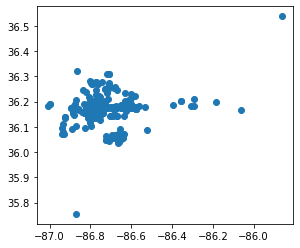

In [20]:
tornado_calls_gpd.plot()

In [21]:
tornado_paths.geometry.centroid

C:\Users\olari\AppData\Local\Temp/ipykernel_2880/591618702.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tornado_paths.geometry.centroid


0    POINT (-86.41602 36.18173)
1    POINT (-87.58605 32.68822)
2    POINT (-86.99640 32.86431)
3    POINT (-85.58815 36.17430)
4    POINT (-85.44407 36.10713)
5    POINT (-84.95104 36.13381)
6    POINT (-85.77695 36.16682)
dtype: geometry

In [22]:
center = tornado_paths.geometry.centroid[0]

C:\Users\olari\AppData\Local\Temp/ipykernel_2880/468265422.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = tornado_paths.geometry.centroid[0]


In [23]:
area_center = [center.y, center.x]
print(area_center)

[36.181727228463764, -86.41601809638975]


In [24]:
calls_map = folium.Map(location = area_center, zoom_start = 10)

In [25]:
folium.GeoJson(path_polygons).add_to(calls_map)


In [26]:
nash_tornado = tornado_paths.loc[tornado_paths['event_id'] == 'Nashville']
nash_tornado = nash_tornado[['geometry']]
nash_tornado

,geometry
0,"LINESTRING (-86.94783 36.17249, -86.94461 36.1..."


In [27]:
tornado_calls_gpd = tornado_calls_gpd.dropna()
tornado_calls_gpd

,time,call,lat,lng,tower_addy,geometry
0,2020-03-03 00:34:00,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.66578 36.07271)
1,2020-03-03 00:36:00,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.84190 36.15963)
2,2020-03-03 00:36:00,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector,POINT (-86.70886 36.26415)
4,2020-03-03 00:36:00,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N,POINT (-86.72108 36.23347)
5,2020-03-03 00:37:00,911 Calls,36.149032,-86.795747,WIRELESS CALLER,POINT (-86.79575 36.14903)
...,...,...,...,...,...,...
470,2020-03-03 04:54:00,911 Calls,36.142552,-86.635330,WIRELESS CALLER,POINT (-86.63533 36.14255)
471,2020-03-03 04:54:00,911 Calls,36.189415,-86.813557,WIRELESS CALLER,POINT (-86.81356 36.18941)
472,2020-03-03 04:55:00,911 Calls,36.223534,-86.757874,WIRELESS CALLER,POINT (-86.75787 36.22353)
473,2020-03-03 04:56:00,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE,POINT (-86.78377 36.16840)


In [28]:
midnight_calls = tornado_calls_gpd[tornado_calls_gpd.time < '2020-03-03 01:00:00']
oneAM_calls = tornado_calls_gpd[(tornado_calls_gpd.time > '2020-03-03 00:59:59')& (tornado_calls.time <'2020-03-03 02:00:00')]
twoAM_calls = tornado_calls_gpd[(tornado_calls_gpd.time > '2020-03-03 01:59:59')& (tornado_calls.time <'2020-03-03 03:00:00')]
threeAM_calls = tornado_calls_gpd[(tornado_calls_gpd.time > '2020-03-03 02:59:59')& (tornado_calls.time <'2020-03-03 04:00:00')]
fourAM_calls = tornado_calls_gpd[(tornado_calls_gpd.time > '2020-03-03 03:59:59')& (tornado_calls.time <'2020-03-03 05:00:00')]


C:\Users\olari\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:828: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [29]:
for row_index, row_values in midnight_calls.iterrows():
    loc = [row_values['lat'], row_values ['lng']]
    pop = [row_values['time']]
    icon = folium.Icon(color = 'red', icon = 'phone', prefix = 'fa')
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    marker.add_to(calls_map)

for row_index, row_values in oneAM_calls.iterrows():
    loc = [row_values['lat'], row_values ['lng']]
    pop = [row_values['time']]
    icon = folium.Icon(color = 'orange', icon = 'phone', prefix = 'fa')
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    marker.add_to(calls_map)

for row_index, row_values in twoAM_calls.iterrows():
    loc = [row_values['lat'], row_values ['lng']]
    pop = [row_values['time']]
    icon = folium.Icon(color = 'yellow', icon = 'phone', prefix = 'fa')
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    marker.add_to(calls_map)
    
for row_index, row_values in threeAM_calls.iterrows():
    loc = [row_values['lat'], row_values ['lng']]
    pop = [row_values['time']]
    icon = folium.Icon(color = 'green', icon = 'phone', prefix = 'fa')
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    marker.add_to(calls_map)
    
for row_index, row_values in fourAM_calls.iterrows():
    loc = [row_values['lat'], row_values ['lng']]
    pop = [row_values['time']]
    icon = folium.Icon(color = 'blue', icon = 'phone', prefix = 'fa')
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    marker.add_to(calls_map)

C:\Users\olari\AppData\Local\Temp/ipykernel_2880/4218719694.py:18: UserWarning: color argument of Icon should be one of: {'lightblue', 'lightgray', 'blue', 'darkpurple', 'white', 'orange', 'green', 'red', 'gray', 'purple', 'darkgreen', 'beige', 'darkblue', 'lightred', 'black', 'pink', 'lightgreen', 'darkred', 'cadetblue'}.
  icon = folium.Icon(color = 'yellow', icon = 'phone', prefix = 'fa')


In [30]:
calls_map

In [31]:
import folium.plugins as plugins

In [32]:
tornado_calls.dropna(inplace=True)

In [33]:
tornado_calls['minute'] = pd.DatetimeIndex(tornado_calls['time']).minute
tornado_calls['second'] = pd.DatetimeIndex(tornado_calls['time']).second
tornado_calls['hour'] = pd.DatetimeIndex(tornado_calls['time']).hour


    



In [34]:
#the filtered polygon path
nash_path = path_polygons.geometry.i.loc[np.r_[4, 10:25,26:35]]

AttributeError: 'GeoSeries' object has no attribute 'i'

In [ ]:
weight_list = []



lista_tempo = [] 
for x in tornado_calls['minute']:
    
    minuteinteger = x
    
    lista_tempo.append(datetime.date(1990,minuteinteger,1).strftime('%B'))
    
tornado_calls['hour_minute'] = [d.split('/')[2]+" "+ d.split('/')[0] for d in tornado_calls.time]

folium.GeoJson(tornado_calls_gpd).add_to(calls_map)

folium.GeoJson(path_polygons).add_to(calls_map)

In [ ]:
calls_grouped = tornado_calls_gpd.groupby([pd.Grouper(key = 'time', freq='30min')]).count().reset_index()


In [ ]:
calls_grouped1 = calls_grouped.iloc[0]

In [ ]:
calls_grouped1

In [ ]:
derecho_calls_grouped = derecho_calls.groupby([pd.Grouper(key = 'time', freq='30min')]).count().reset_index()
derecho_calls_grouped

In [ ]:
for index, rows in calls_grouped.iterrows():
        icon=folium.Icon(color="blue",icon='wind', prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(calls_map)
calls_map

In [ ]:
# derecho_grouper_1h = derecho_calls.groupby(by=[pd.Grouper(key = 'Call_Time', freq='1h'), "Emergency_Calls"]).count().reset_index()
# derecho_grouper_1h
# derecho_calls['Call_Time'] = pd.to_datetime(derecho_calls['Call_Time'])
# derecho_calls['elapsed'] = derecho_calls['Call_Time'] - derecho_calls['Call_Time'].min()
